<a href="https://colab.research.google.com/github/anitarestrepo16/machine-learning-class-2023/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Sci-kit learn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Visualization
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# Chapter 6 - Question 9

In [3]:
college = pd.read_csv('/drive/My Drive/Colab Notebooks/Data-College.csv')
college.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
college["Private"].unique()

array(['Yes', 'No'], dtype=object)

In [5]:
college["Private"] = np.where(college['Private'] == "Yes", 1, 0)
college["Private"].unique()

array([1, 0])

In [6]:
mod_MSEs = {}

## 9a
Split Data

In [7]:
train, test = train_test_split(college, test_size = 0.5, random_state = 37)
test.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
255,Hiram College,1,922,729,244,37,66,1000,275,14067,4560,400,1000,75,95,10.6,34,12165,79
707,Valparaiso University,1,2075,1727,520,49,81,2501,198,11800,3260,500,800,87,89,14.2,23,9681,95
468,Randolph-Macon Woman's College,1,696,616,169,35,66,653,56,13970,6110,370,920,88,97,9.2,24,16358,68
325,Louisiana Tech University,0,2397,2144,1525,22,45,6720,1822,3957,2325,618,1656,66,77,20.0,13,4546,45
34,Baldwin-Wallace College,1,1690,1366,662,30,61,2718,1460,10995,4410,1000,1000,68,74,17.6,20,8086,85


In [8]:
X_train = train.drop(['Unnamed: 0', 'Apps'], axis = 1)
y_train = train['Apps']
X_test = test.drop(['Unnamed: 0', 'Apps'], axis = 1)
y_test = test['Apps']

## 6b
OLS

In [9]:
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [10]:
mod_MSEs["OLS"] = mean_squared_error(y_test, pipe.predict(X_test))

## 6c
Ridge Regression

In [11]:
params = {'alpha': np.linspace(.01, 10, 100)}
ridge_cv = GridSearchCV(estimator = Ridge(), param_grid = params, scoring = 'neg_mean_squared_error', cv = 10, return_train_score = True)
pipe = make_pipeline(StandardScaler(), ridge_cv).fit(X_train, y_train)
ridge = pipe[-1]

In [12]:
cv_ridge_res = pd.DataFrame(ridge.cv_results_)
cv_ridge_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009010,0.005259,0.005233,0.007139,0.01,{'alpha': 0.01},-1.381983e+06,-1.800840e+06,-432993.502402,-1.018770e+06,...,-1.234224e+06,-1.175014e+06,-1.178713e+06,-1.093627e+06,-1.215409e+06,-1.050730e+06,-1.070780e+06,-1.137190e+06,-1.139469e+06,59449.715143
1,0.013072,0.013223,0.002009,0.003447,0.110909,{'alpha': 0.1109090909090909},-1.381489e+06,-1.800974e+06,-433605.658080,-1.020206e+06,...,-1.234236e+06,-1.175025e+06,-1.178729e+06,-1.093648e+06,-1.215420e+06,-1.050744e+06,-1.070795e+06,-1.137204e+06,-1.139483e+06,59448.135475
2,0.003628,0.003209,0.000735,0.000118,0.211818,{'alpha': 0.21181818181818182},-1.380961e+06,-1.801154e+06,-434216.400757,-1.021625e+06,...,-1.234267e+06,-1.175055e+06,-1.178771e+06,-1.093702e+06,-1.215449e+06,-1.050780e+06,-1.070836e+06,-1.137241e+06,-1.139519e+06,59444.041803
3,0.001924,0.000504,0.000646,0.000032,0.312727,{'alpha': 0.31272727272727274},-1.380404e+06,-1.801376e+06,-434825.720400,-1.023029e+06,...,-1.234317e+06,-1.175102e+06,-1.178836e+06,-1.093789e+06,-1.215495e+06,-1.050837e+06,-1.070900e+06,-1.137300e+06,-1.139576e+06,59437.594049
4,0.002487,0.001122,0.000769,0.000243,0.413636,{'alpha': 0.41363636363636364},-1.379817e+06,-1.801639e+06,-435433.608895,-1.024418e+06,...,-1.234385e+06,-1.175165e+06,-1.178925e+06,-1.093905e+06,-1.215558e+06,-1.050914e+06,-1.070987e+06,-1.137379e+06,-1.139653e+06,59428.942366


In [13]:
ridge.best_params_

{'alpha': 4.752727272727272}

In [14]:
pipe = make_pipeline(StandardScaler(), RidgeCV(alphas = [4.75], scoring = 'neg_mean_squared_error', cv = 10))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([4.75]), cv=10,
                         scoring='neg_mean_squared_error'))])

In [15]:
mod_MSEs["Ridge"] = mean_squared_error(y_test, pipe.predict(X_test))

## 6d
Lasso

In [16]:
params = {'alpha': np.linspace(.01, 30, 100)}
lasso_cv = GridSearchCV(estimator = Lasso(), param_grid = params, scoring = 'neg_mean_squared_error', cv = 10, return_train_score = True)
pipe = make_pipeline(StandardScaler(), lasso_cv).fit(X_train, y_train)
lasso = pipe[-1]

In [17]:
lasso.best_params_

{'alpha': 19.094545454545457}

In [18]:
pipe = make_pipeline(StandardScaler(), LassoCV(alphas = [19.09], cv = 10))
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lassocv', LassoCV(alphas=[19.09], cv=10))])

In [19]:
mod_MSEs["Lasso"] = mean_squared_error(y_test, pipe.predict(X_test))

In [20]:
lasso = pipe[-1]

In [21]:
coefs = pd.DataFrame({"Feature": X_train.columns, "coef": lasso.coef_})
coefs["removed"] = np.where(coefs["coef"] == 0, "Yes", "No")

In [22]:
coefs

,Feature,coef,removed
0,Private,-248.448625,No
1,Accept,2816.832434,No
2,Enroll,0.000000,Yes
3,Top10perc,801.826843,No
4,Top25perc,-155.290807,No
5,F.Undergrad,305.243172,No
6,P.Undergrad,1.507739,No
7,Outstate,-136.577694,No
8,Room.Board,138.083844,No
9,Books,-0.000000,Yes


## 6e
PCA

In [23]:
M = range(1, X_train.shape[1] + 1)
scores = {}
for m in M:
    pcr = make_pipeline(
        StandardScaler(),       # First transformer
        PCA(n_components=m),    # Second transformer
        LinearRegression()      # Estimator
        )
    score = -1*np.mean(cross_val_score(pcr, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))
    scores[str(m)] = score

In [24]:
scores

{'1': 13159251.311893739,
 '2': 3245971.7315815045,
 '3': 3203376.62239917,
 '4': 2161915.4691368598,
 '5': 2064871.7630033563,
 '6': 1966250.1990602005,
 '7': 1893272.7192713432,
 '8': 1773814.7574368832,
 '9': 1664028.76207649,
 '10': 1734512.398065764,
 '11': 1767309.0786523398,
 '12': 1741623.44876008,
 '13': 1753042.4459046586,
 '14': 1763556.4212828379,
 '15': 1798311.5073877363,
 '16': 1379434.7981826242,
 '17': 1406069.9382529554}

Text(0.5, 1.0, 'Principal Component Regression')

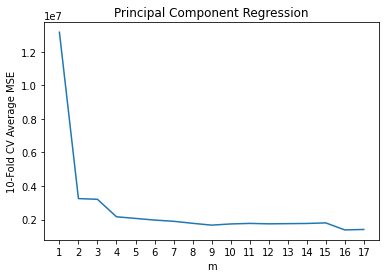

In [25]:
# Visualize the results
plt.figure(facecolor='white')
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('m')
plt.ylabel('10-Fold CV Average MSE')
plt.title('Principal Component Regression')

In [26]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(n_components = 4),
    LinearRegression()
)
pipe.fit(X_train, y_train)
mod_MSEs["PCA"] = mean_squared_error(y_test, pipe.predict(X_test))

## 6f
PLS

In [27]:
M = range(1, X_train.shape[1] + 1)
scores = {}
for m in M:
    pls = make_pipeline(
        StandardScaler(),       # First transformer
        PLSRegression(n_components=m) # Estimator
        )
    score = -1*np.mean(cross_val_score(pls, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))
    scores[str(m)] = score

Text(0.5, 1.0, 'PLS Regression')

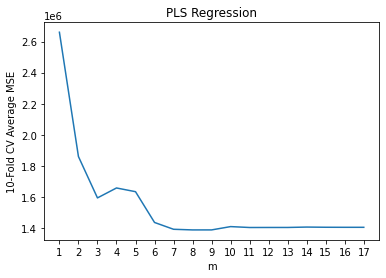

In [28]:
# Visualize the results
plt.figure(facecolor='white')
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel('m')
plt.ylabel('10-Fold CV Average MSE')
plt.title('PLS Regression')

In [29]:
pipe = make_pipeline(
    StandardScaler(),
    PLSRegression(n_components = 7)
)
pipe.fit(X_train, y_train)
mod_MSEs["PLS"] = mean_squared_error(y_test, pipe.predict(X_test))

## 6g
Compare

In [30]:
mod_MSEs

{'OLS': 1222954.0382534459,
 'Ridge': 1405599.7724503141,
 'Lasso': 1243425.7943309909,
 'PCA': 3460816.154371419,
 'PLS': 1392570.3911683063}

Text(0.5, 1.0, 'Model Comparisons')

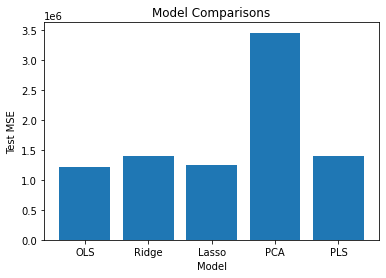

In [31]:
# Visualize the results
plt.figure(facecolor='white')
plt.bar(list(mod_MSEs.keys()), list(mod_MSEs.values()))
plt.xlabel('Model')
plt.ylabel('Test MSE')
plt.title('Model Comparisons')

#2B

In [32]:
oj = pd.read_csv('/drive/My Drive/Colab Notebooks/Data-OJ.csv')
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [33]:
oj.Store7.unique()

array(['No', 'Yes'], dtype=object)

In [34]:
oj["Store7"] = np.where(
    oj["Store7"] == "Yes", 1, 0
)
oj.Store7.unique()

array([0, 1])

##2bi
Split data

In [35]:
train, test = train_test_split(oj, train_size = 800, random_state = 37)

In [36]:
train.shape

(800, 18)

In [37]:
X_train = train.drop(["Purchase"], axis = 1)
y_train = train["Purchase"]
X_test = test.drop(["Purchase"], axis = 1)
y_test = test["Purchase"]

##2bii

In [62]:
tree = DecisionTreeClassifier(random_state = 1).fit(X_train, y_train)
tree.score(X_train, y_train)

0.99

##2biii

[Text(0.4521940418679549, 0.96875, 'X[8] <= 0.504\ngini = 0.477\nsamples = 800\nvalue = [486, 314]'),
 Text(0.20471014492753623, 0.90625, 'X[8] <= 0.276\ngini = 0.394\nsamples = 352\nvalue = [95, 257]'),
 Text(0.06602254428341385, 0.84375, 'X[8] <= 0.051\ngini = 0.198\nsamples = 171\nvalue = [19, 152]'),
 Text(0.01288244766505636, 0.78125, 'X[0] <= 268.5\ngini = 0.031\nsamples = 64\nvalue = [1, 63]'),
 Text(0.00644122383252818, 0.71875, 'gini = 0.0\nsamples = 52\nvalue = [0, 52]'),
 Text(0.01932367149758454, 0.71875, 'X[9] <= 2.15\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.01288244766505636, 0.65625, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.02576489533011272, 0.65625, 'X[0] <= 269.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01932367149758454, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.0322061191626409, 0.59375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11916264090177134, 0.78125, 'X[10] <= 1.975\ngini = 0.28\nsamples = 107

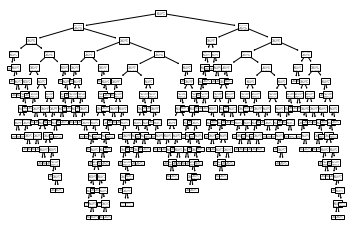

In [39]:
plot_tree(tree)

In [40]:
smol_tree = DecisionTreeClassifier(random_state = 1, max_depth = 3).fit(X_train, y_train)
smol_tree.score(X_train, y_train)

0.84125

[Text(0.5, 0.875, 'X[8] <= 0.504\ngini = 0.477\nsamples = 800\nvalue = [486, 314]'),
 Text(0.25, 0.625, 'X[8] <= 0.276\ngini = 0.394\nsamples = 352\nvalue = [95, 257]'),
 Text(0.125, 0.375, 'X[8] <= 0.051\ngini = 0.198\nsamples = 171\nvalue = [19, 152]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 64\nvalue = [1, 63]'),
 Text(0.1875, 0.125, 'gini = 0.28\nsamples = 107\nvalue = [18, 89]'),
 Text(0.375, 0.375, 'X[11] <= 0.05\ngini = 0.487\nsamples = 181\nvalue = [76, 105]'),
 Text(0.3125, 0.125, 'gini = 0.342\nsamples = 73\nvalue = [16, 57]'),
 Text(0.4375, 0.125, 'gini = 0.494\nsamples = 108\nvalue = [60, 48]'),
 Text(0.75, 0.625, 'X[11] <= -0.39\ngini = 0.222\nsamples = 448\nvalue = [391, 57]'),
 Text(0.625, 0.375, 'X[8] <= 0.764\ngini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.5625, 0.125, 'gini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Text(0.6875, 0.125, 'gini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.875, 0.375, 'X[8] <= 0.704\ngini = 0.172\nsamples = 421\nvalue =

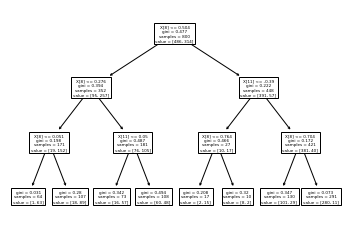

In [41]:
plot_tree(smol_tree)

##2biv

In [42]:
y_pred = tree.predict(X_test)

Text(30.5, 0.5, 'Actual Values')

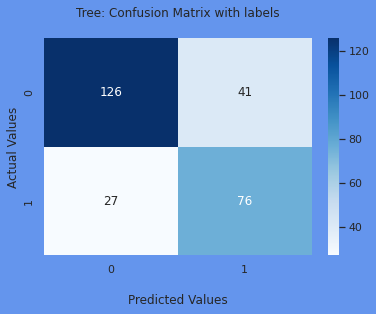

In [43]:
cm = confusion_matrix(y_test, y_pred)

sns.set(rc={'figure.facecolor': 'cornflowerblue'})
ax = sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues')
ax.set_title('Tree: Confusion Matrix with labels\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

In [44]:
tree.score(X_test, y_test)

0.7481481481481481

##2bv

In [45]:
params = {"ccp_alpha": np.linspace(0, 1, 100)}
tree_cv = GridSearchCV(DecisionTreeClassifier(random_state = 13), params, cv = 5, scoring = "accuracy")
cv_res = tree_cv.fit(X_train, y_train)

In [69]:
cv_res.best_params_

{'ccp_alpha': 0.010101010101010102}

Text(0.5, 1.0, 'Tuning Alpha')

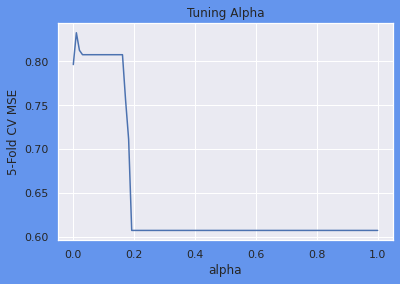

In [47]:
plt.plot(pd.DataFrame(cv_res.cv_results_)["param_ccp_alpha"], pd.DataFrame(cv_res.cv_results_)["mean_test_score"])
plt.xlabel('alpha')
plt.ylabel('5-Fold CV MSE')
plt.title('Tuning Alpha')

##2bvi

In [52]:
alphas = np.linspace(0, 1, 100)
tree_sizes = []
for alpha in alphas:
    temp_tree = DecisionTreeClassifier(random_state = 13, ccp_alpha = alpha).fit(X_train, y_train)
    # get number of leaves
    tree_sizes.append(temp_tree.get_n_leaves())

Text(0.5, 1.0, 'Tree Size by Alpha')

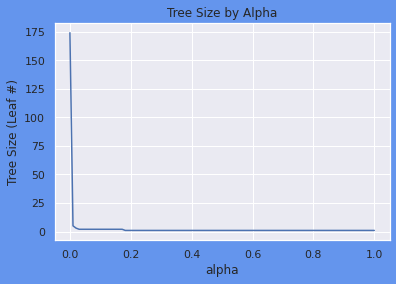

In [55]:
plt.plot(alphas, tree_sizes)
plt.xlabel('alpha')
plt.ylabel('Tree Size (Leaf #)')
plt.title('Tree Size by Alpha')

##2bvii

In [70]:
tree_optimal = DecisionTreeClassifier(random_state = 13, ccp_alpha = 0.01).fit(X_train, y_train)


[Text(0.5, 0.875, 'X[8] <= 0.504\ngini = 0.477\nsamples = 800\nvalue = [486, 314]'),
 Text(0.25, 0.625, 'X[8] <= 0.276\ngini = 0.394\nsamples = 352\nvalue = [95, 257]'),
 Text(0.125, 0.375, 'gini = 0.198\nsamples = 171\nvalue = [19, 152]'),
 Text(0.375, 0.375, 'X[11] <= 0.05\ngini = 0.487\nsamples = 181\nvalue = [76, 105]'),
 Text(0.25, 0.125, 'gini = 0.342\nsamples = 73\nvalue = [16, 57]'),
 Text(0.5, 0.125, 'gini = 0.494\nsamples = 108\nvalue = [60, 48]'),
 Text(0.75, 0.625, 'X[11] <= -0.39\ngini = 0.222\nsamples = 448\nvalue = [391, 57]'),
 Text(0.625, 0.375, 'gini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.875, 0.375, 'gini = 0.172\nsamples = 421\nvalue = [381, 40]')]

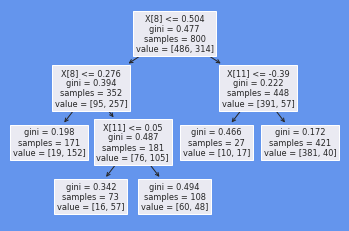

In [71]:
plot_tree(tree_optimal)

In [58]:
opt_tree_2 = DecisionTreeClassifier(random_state = 13, max_leaf_nodes = 5).fit(X_train, y_train)

[Text(0.5, 0.875, 'X[8] <= 0.504\ngini = 0.477\nsamples = 800\nvalue = [486, 314]'),
 Text(0.25, 0.625, 'X[8] <= 0.276\ngini = 0.394\nsamples = 352\nvalue = [95, 257]'),
 Text(0.125, 0.375, 'gini = 0.198\nsamples = 171\nvalue = [19, 152]'),
 Text(0.375, 0.375, 'X[11] <= 0.05\ngini = 0.487\nsamples = 181\nvalue = [76, 105]'),
 Text(0.25, 0.125, 'gini = 0.342\nsamples = 73\nvalue = [16, 57]'),
 Text(0.5, 0.125, 'gini = 0.494\nsamples = 108\nvalue = [60, 48]'),
 Text(0.75, 0.625, 'X[11] <= -0.39\ngini = 0.222\nsamples = 448\nvalue = [391, 57]'),
 Text(0.625, 0.375, 'gini = 0.466\nsamples = 27\nvalue = [10, 17]'),
 Text(0.875, 0.375, 'gini = 0.172\nsamples = 421\nvalue = [381, 40]')]

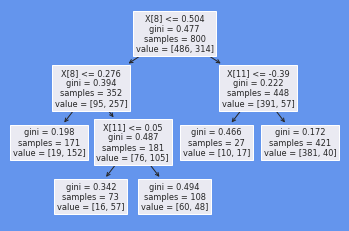

In [59]:
plot_tree(opt_tree_2)

##2bviii

In [63]:
tree.score(X_train, y_train)

0.99

In [72]:
tree_optimal.score(X_train, y_train)

0.83375

In [66]:
opt_tree_2.score(X_train, y_train)

0.83375

##2bix

In [64]:
tree.score(X_test, y_test)

0.7481481481481481

In [73]:
tree_optimal.score(X_test, y_test)

0.8185185185185185

In [67]:
opt_tree_2.score(X_test, y_test)

0.8185185185185185